# Load and Inspect Dataset
Load the dataX.pkl and dataY.pkl files using pickle. Display the array shapes and inspect data statistics.

In [1]:
import pickle
import numpy as np

# Load the dataset
with open('data/dataX.pkl', 'rb') as f:
    dataX = pickle.load(f)

with open('data/dataY.pkl', 'rb') as f:
    dataY = pickle.load(f)

# Display the shapes of the arrays
print(f'dataX shape: {dataX.shape}')
print(f'dataY shape: {dataY.shape}')

# Inspect data statistics
print(f'dataX statistics:\n Min: {np.min(dataX)}, Max: {np.max(dataX)}, Mean: {np.mean(dataX)}, Std: {np.std(dataX)}')
print(f'dataY statistics:\n Min: {np.min(dataY)}, Max: {np.max(dataY)}, Mean: {np.mean(dataY)}, Std: {np.std(dataY)}')

dataX shape: (981, 3, 172, 79)
dataY shape: (981, 3, 172, 79)
dataX statistics:
 Min: -50.0, Max: 4.0, Mean: -0.07472902536392212, Std: 5.5050950050354
dataY statistics:
 Min: -2.168177604675293, Max: 1.9952000379562378, Mean: 0.035689931362867355, Std: 0.05763611942529678


# Visualise Input Features
Create plots to visualize the 3 input channels (SDF from obstacle, flow region labels, SDF from boundaries) using matplotlib.

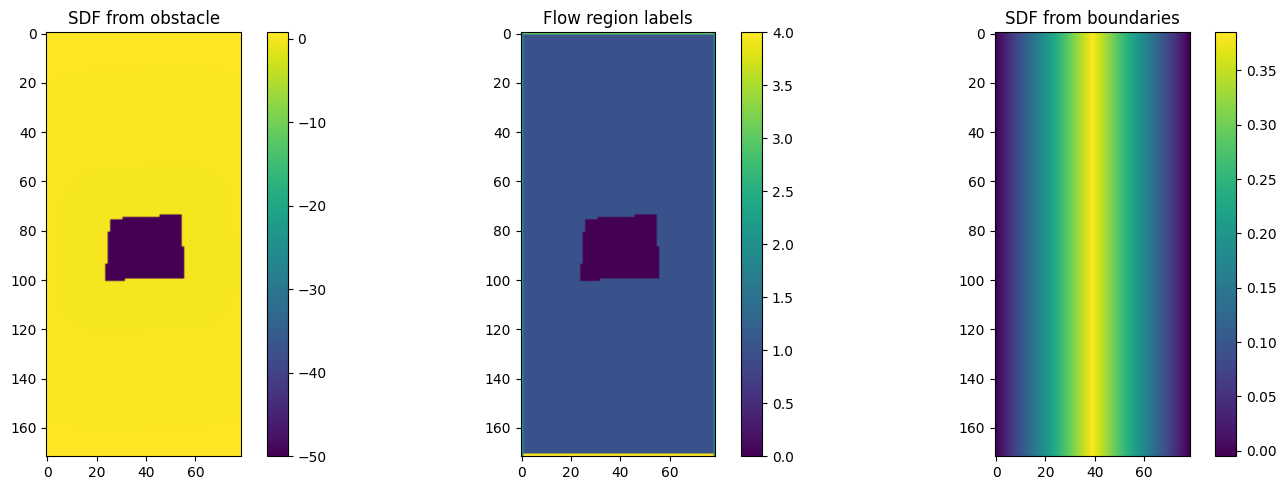

In [2]:
import matplotlib.pyplot as plt

# Select a sample to visualize
sample_idx = 0
sample = dataX[sample_idx]

# Define titles for the input channels
titles = ['SDF from obstacle', 'Flow region labels', 'SDF from boundaries']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each channel
for i in range(3):
    ax = axes[i]
    im = ax.imshow(sample[i], cmap='viridis')
    ax.set_title(titles[i])
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

# Visualise Ground Truth CFD Results
Plot the ground truth velocity fields (Ux, Uy) and pressure field (p) from the dataY file using contour plots.

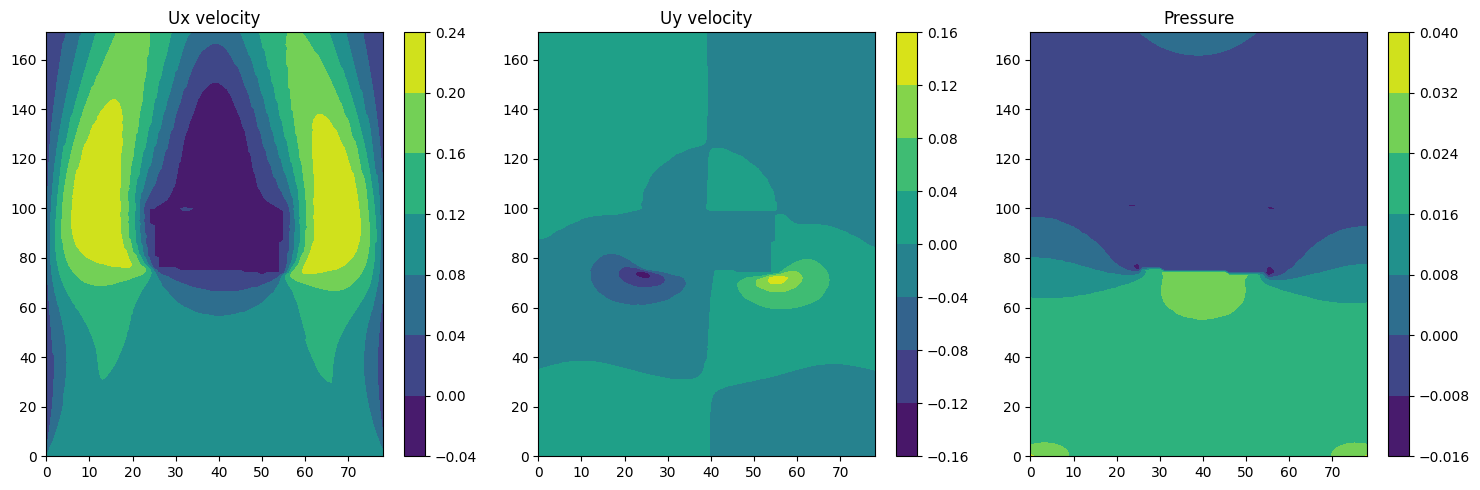

In [3]:
import matplotlib.pyplot as plt

# Select a sample to visualize
sample_idx = 0
sample = dataY[sample_idx]

# Define titles for the output channels
titles = ['Ux velocity', 'Uy velocity', 'Pressure']

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot each channel
for i in range(3):
    ax = axes[i]
    im = ax.contourf(sample[i], cmap='viridis')
    ax.set_title(titles[i])
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

# Compare Sample Predictions
Load a trained model, generate predictions, and create side-by-side comparisons with ground truth including error plots.

In [ ]:
import torch

# Load the trained model
model_path = '../DeepCFD/model_output.pt'
model_state = torch.load(model_path, map_location=torch.device('cpu'))

# Extract model parameters
input_shape = model_state.pop('input_shape')
filters = model_state.pop('filters')
kernel_size = model_state.pop('kernel_size')
net = model_state.pop('architecture')

# Initialize the model
model = net(3, 3, filters=filters, kernel_size=kernel_size)
model.load_state_dict(model_state)
model.eval()

# Select a sample to visualize
sample_idx = 0
input_sample = torch.FloatTensor(dataX[sample_idx:sample_idx+1])
ground_truth = torch.FloatTensor(dataY[sample_idx:sample_idx+1])

# Generate prediction
with torch.no_grad():
    prediction = model(input_sample)

# Convert tensors to numpy arrays for visualization
input_sample = input_sample.numpy()[0]
ground_truth = ground_truth.numpy()[0]
prediction = prediction.numpy()[0]

# Define titles for the output channels
titles = ['Ux velocity', 'Uy velocity', 'Pressure']

# Create subplots for ground truth and prediction
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i in range(3):
    # Ground truth
    ax = axes[i, 0]
    im = ax.contourf(ground_truth[i], cmap='viridis')
    ax.set_title(f'Ground Truth - {titles[i]}')
    fig.colorbar(im, ax=ax)
    
    # Prediction
    ax = axes[i, 1]
    im = ax.contourf(prediction[i], cmap='viridis')
    ax.set_title(f'Prediction - {titles[i]}')
    fig.colorbar(im, ax=ax)
    
    # Error
    ax = axes[i, 2]
    error = np.abs(ground_truth[i] - prediction[i])
    im = ax.contourf(error, cmap='viridis')
    ax.set_title(f'Error - {titles[i]}')
    fig.colorbar(im, ax=ax)

plt.tight_layout()
plt.show()

UnpicklingError: Weights only load failed. This file can still be loaded, to do so you have two options, [1mdo those steps only if you trust the source of the checkpoint[0m. 
	(1) In PyTorch 2.6, we changed the default value of the `weights_only` argument in `torch.load` from `False` to `True`. Re-running `torch.load` with `weights_only` set to `False` will likely succeed, but it can result in arbitrary code execution. Do it only if you got the file from a trusted source.
	(2) Alternatively, to load with `weights_only=True` please check the recommended steps in the following error message.
	WeightsUnpickler error: Unsupported global: GLOBAL deepcfd.models.UNetEx.UNetEx was not an allowed global by default. Please use `torch.serialization.add_safe_globals([UNetEx])` or the `torch.serialization.safe_globals([UNetEx])` context manager to allowlist this global if you trust this class/function.

Check the documentation of torch.load to learn more about types accepted by default with weights_only https://pytorch.org/docs/stable/generated/torch.load.html.

# Plot Training Metrics
Generate learning curves showing training/validation losses and MSE metrics for Ux, Uy and pressure predictions over epochs.

In [ ]:
import matplotlib.pyplot as plt

# Assuming the following lists are available from the training process
# train_loss_curve, test_loss_curve, train_mse_curve, test_mse_curve
# train_ux_curve, test_ux_curve, train_uy_curve, test_uy_curve
# train_p_curve, test_p_curve

# Plot training and validation loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss_curve, label='Training Loss')
plt.plot(test_loss_curve, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot MSE metrics for Ux, Uy, and Pressure
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Ux MSE
axes[0].plot(train_ux_curve, label='Training Ux MSE')
axes[0].plot(test_ux_curve, label='Validation Ux MSE')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Ux MSE')
axes[0].set_title('Training and Validation Ux MSE')
axes[0].legend()
axes[0].grid(True)

# Uy MSE
axes[1].plot(train_uy_curve, label='Training Uy MSE')
axes[1].plot(test_uy_curve, label='Validation Uy MSE')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Uy MSE')
axes[1].set_title('Training and Validation Uy MSE')
axes[1].legend()
axes[1].grid(True)

# Pressure MSE
axes[2].plot(train_p_curve, label='Training Pressure MSE')
axes[2].plot(test_p_curve, label='Validation Pressure MSE')
axes[2].set_xlabel('Epochs')
axes[2].set_ylabel('Pressure MSE')
axes[2].set_title('Training and Validation Pressure MSE')
axes[2].legend()
axes[2].grid(True)

plt.tight_layout()
plt.show()